# Churn Modeling in Telecommunications Customers

In this notebook, the focus will be on the **modeling** phase of the churn prediction problem for a telecommunications company. After the prior stages of **exploration** and **data preprocessing** have been completed, machine learning models will be built and evaluated to identify patterns in customer behavior and predict their likelihood of churn.

## Objectives

- Various suitable **machine learning algorithms** will be selected and trained for churn prediction.
- The performance of the models will be compared using evaluation **metrics** such as accuracy, F1-score, precision, and recall.
- **Hyperparameter tuning** will be performed to improve the performance of the most promising model.
- The **most important features** that influence churn prediction will be analyzed to understand their impact.

This notebook represents the culmination of the data analysis, where insights gained will be translated into predictive models that can be used to enhance customer retention and optimize business strategies.

In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [7]:
path = '../telco_customer_churn/data/preprocessed_dataset.csv'
df = pd.read_csv(path)
df.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.000000,0.115423,0.001275,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,0.464789,0.385075,0.215867,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0.014085,0.354229,0.010310,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,1
3,0,0.619718,0.239303,0.210241,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,0.014085,0.521891,0.015330,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1


## Logistic Regression Model with All Variables

A basic **Logistic Regression** model will be implemented using all variables from the preprocessed dataset. This model will serve as a reference point for future models, helping to establish baseline performance and providing insights into the factors affecting churn.


In [8]:
# Splitting the Data into Training and Testing Sets:
X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Initializing the LogisticRegression model:
model = LogisticRegression()

# Training the model using the training sets:
model.fit(X_train,y_train)

# Making predictions:
y_pred = model.predict(X_test)

# Evaluating the Model's Performance
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Confussion matrix:\n {pd.DataFrame(confusion_matrix(y_test,y_pred))}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, umbrales = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

Accuracy score: 0.795734597156398
Confussion matrix:
       0    1
0  1381  168
1   263  298

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

AUC: 0.8381463977104429


# Improving Model Performance through PCA

## Introduction

Principal Component Analysis (PCA) is a dimensionality reduction technique that will be used to attempt to improve the performance of our baseline model. By applying PCA, we aim to reduce noise and multicollinearity in the data, which can result in a more efficient and robust model.

## Objective

The objective is to transform our feature set using PCA and evaluate whether this transformation leads to an improvement in model performance metrics, such as accuracy, confusion matrix, and AUC, compared to the baseline model.


## Correlation Analysis:

<Axes: >

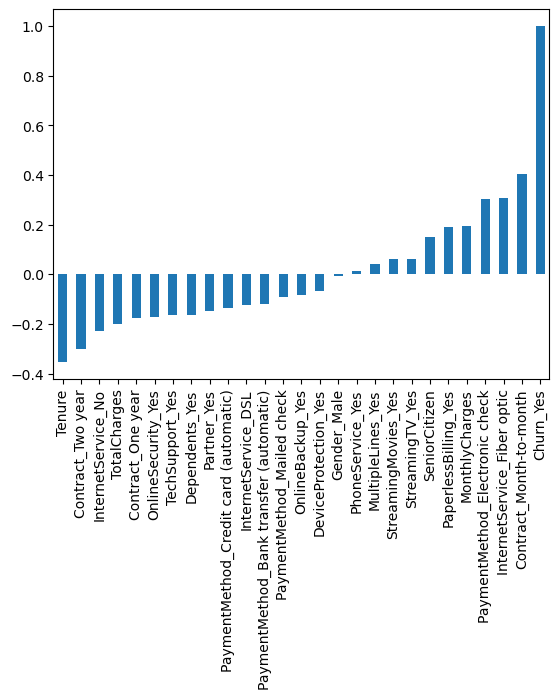

In [9]:
df.corr()['Churn_Yes'].sort_values(ascending=True).plot(kind='bar')

# Variable Selection for PCA

## Correlation Analysis

A correlation analysis was conducted to examine the relationship between the features and the target variable, **Churn_Yes**. The bar chart illustrated the strength and direction of these correlations, helping to identify the variables most closely associated with churn.

## Variable Selection

Based on this analysis, the number of selected variables is **6**, which will be used as input features for Principal Component Analysis (PCA) to enhance the predictive performance of the model.


In [10]:
# Apply PCA and reduce to 6 principal components
pca = PCA(n_components=6)
X_pca = pd.DataFrame(pca.fit_transform(df))

# Initialize the logistic regression model
model_pca = LogisticRegression()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train the model using the training data
model_pca.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pca.predict(X_test)

# Evaluating the model's performance
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion matrix:\n {pd.DataFrame(confusion_matrix(y_test, y_pred))}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_pred_proba = model_pca.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

Accuracy score: 0.8312796208530806
Confusion matrix:
       0    1
0  1390  159
1   197  364

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1549
           1       0.70      0.65      0.67       561

    accuracy                           0.83      2110
   macro avg       0.79      0.77      0.78      2110
weighted avg       0.83      0.83      0.83      2110

AUC: 0.8949123636777911


# Conclusions

## Project Summary

In this project, the goal was to develop a predictive model to understand customer churn within a telecommunications company. The following steps were undertaken:

1. **Data Exploration and Preprocessing**:
   - The dataset was explored to understand its structure and the distribution of features related to customer churn.
   - Correlation analysis was performed to identify relationships between the features and the target variable, **Churn**.

2. **Baseline Model Development**:
   - A basic logistic regression model was created to establish a performance baseline before implementing further improvements.

3. **Dimensionality Reduction**:
   - Principal Component Analysis (PCA) was applied to reduce dimensionality while retaining essential information.
  
4. **Model Development**:
   - The logistic regression model was retrained using the transformed features obtained from PCA.
   - The dataset was split into training and testing sets to evaluate the model's performance.

5. **Model Evaluation**:
   - The model was evaluated using various metrics, including accuracy, confusion matrix, classification report, and AUC.
   - The results indicated a solid performance, with an accuracy score of approximately 83.1% and an AUC of 0.895.

## Conclusions

The analysis demonstrated that PCA effectively reduced dimensionality and helped in simplifying the feature set without compromising model performance. The establishment of a baseline model allowed for comparison and assessment of improvements made through PCA.

Although the model performed well, further improvements could be explored, such as:
- **Experimenting with different algorithms**: Testing other models might yield better results, especially for the minority class.
- **Hyperparameter tuning**: Optimizing the model parameters could enhance predictive accuracy.
- **Collecting more data**: Additional data, particularly for the minority class, might provide further insights and improve model robustness.

Overall, the project successfully showcased the application of PCA and logistic regression in predicting customer churn, providing valuable insights for decision-making in the telecommunications industry.
